In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler , StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Loading the Datasets
df = pd.read_csv('house_rental_data.csv.txt' , index_col=0)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [4]:
# Checking the Dtypes
df.dtypes

Sqft           float64
Floor            int64
TotalFloor       int64
Bedroom          int64
Living.Room      int64
Bathroom         int64
Price            int64
dtype: object

In [5]:
# Shape of the Data
df.shape

(645, 7)

In [6]:
# Rows and Columns
print("No of Rows : " , df.shape[0])
print("No of Columns : " , df.shape[1])

No of Rows :  645
No of Columns :  7


In [7]:
# Checking the Missing Value
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [8]:
# Evaluating the Data
print(df.keys())

Index(['Sqft', 'Floor', 'TotalFloor', 'Bedroom', 'Living.Room', 'Bathroom',
       'Price'],
      dtype='object')


In [9]:
# Performing the Standard Scaling
mms = StandardScaler()
df[['Sqft', 'Price']] = mms.fit_transform(df[['Sqft', 'Price']])
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,-0.456393,2,7,2,2,2,0.000370
2,0.791798,5,7,4,2,2,0.449714
3,-0.507434,5,7,2,2,1,-0.111966
4,-0.089824,2,7,3,2,2,-0.477058
5,-0.730160,11,14,3,2,2,-0.477058


In [10]:
# Optimun Number Of Cluster
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)

# Making a Separate array file having data for annual income and spending score
array1 = df['Sqft'].to_numpy()
array2 = df['Price'].to_numpy()
array = np.array(list(zip(array1 , array2))).reshape(len(array1),2)

for k in K :
    # Building and Fitting the Model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(array)
    
    distortions.append(sum(np.min(cdist(array, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / array.shape[0])
    inertias.append(kmeanModel.inertia_)
    
    mapping1[k] = sum(np.min(cdist(array,kmeanModel.cluster_centers_,'euclidean') ,axis=1)) / array.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [11]:
print(mapping1)

{1: 1.1026174096340793, 2: 0.7546661560526784, 3: 0.5921762231947602, 4: 0.48933389284969697, 5: 0.4443708994985008, 6: 0.398108374918737, 7: 0.37610329612516064, 8: 0.3461881579424956, 9: 0.33797261959649694, 10: 0.32498612647202163, 11: 0.30339947379652127, 12: 0.28902766939230684, 13: 0.2751211258630031, 14: 0.2583715503724905}


1 : 1.1026174096340793
2 : 0.7546661560526784
3 : 0.5921762231947602
4 : 0.48933389284969697
5 : 0.4443708994985008
6 : 0.398108374918737
7 : 0.37610329612516064
8 : 0.3461881579424956
9 : 0.33797261959649694
10 : 0.32498612647202163
11 : 0.30339947379652127
12 : 0.28902766939230684
13 : 0.2751211258630031
14 : 0.2583715503724905


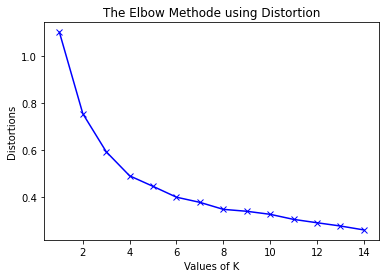

In [12]:
# Plot using Distortion
for key , val in mapping1.items():
    print(str(key)+' : '+str(val))
    
#Plot Code
plt.plot(K , distortions , 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortions')
plt.title('The Elbow Methode using Distortion')
plt.show()

[[-0.21742713 -0.40660304]
 [ 0.54852319  0.12651158]
 [ 1.80488943  1.68281463]
 [-0.98707061 -0.75564779]
 [ 0.4293981   1.09876319]
 [ 3.29145473  3.60173078]]


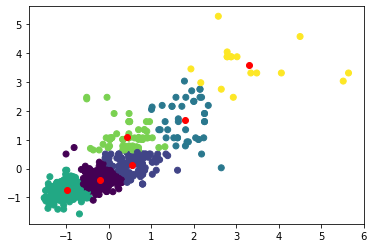

In [15]:
# Finding Centroid
data = pd.DataFrame(array,columns=('Sqft' , 'Price'))
data.head()

kmeans = KMeans(n_clusters=6).fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(data['Sqft'] , data['Price'] , c = kmeans.labels_.astype(float))
plt.scatter(centroids[:,0] , centroids[:,1] , c = "red")
plt.show()